# Linear Regression


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

About the file:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Variables encoding: https://www.kaggle.com/c/home-data-for-ml-course/data


With *SalePrice* target variable and *79 explanatory variables* the dataset describes many aspects of residential homes in Ames, Iowa.

We should pay attention to the fact that not every numeric variable is really numeric.

Variables description:

    SalePrice: Property's sale price in dollars.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

In [52]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [54]:
# Types of variables
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'GarageArea' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'MiscVal' 'MoSold' 'YrSold' 'SalePrice']

Type: object
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'S

In [55]:
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Looks like most part of the data is missing for 'PoolQC', 'MiscFeature', 'Alley' and 'Fence'. But since these variables represent the quality or type of particular feature, _NaN_ value represents the absence of them. The same is true about several other categorical features. 

### Dependent variable

**'SalePrice'** is the variable we're trying to predict, so we start our analysis with it's exploration.

In [56]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

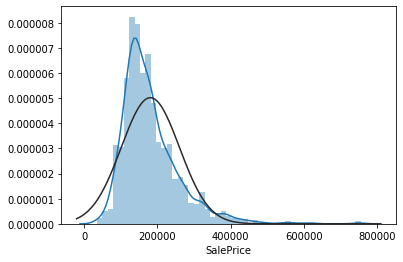

In [57]:
sns.distplot(df.SalePrice, fit=stats.norm) 

In [58]:
print('Skewness: {:.4f}'.format(df['SalePrice'].skew()))
print('Kurtosis: {:.4f}'.format(df['SalePrice'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['SalePrice'].quantile(0.9)/df['SalePrice'].quantile(0.1)))

Skewness: 1.8829
Kurtosis: 6.5363
Quartile Deviation: 42012.5000
Decile Ratio: 2.6109


In [59]:
stats.kstest(df.SalePrice, 'norm', args=(df.SalePrice.mean(), df.SalePrice.std()))

KstestResult(statistic=0.12368542719946385, pvalue=6.330230702928437e-20)

The dependent variable "SalePrice" deviates from the normal distribution, is positively skewed and leptokurtic. The mean value is 180444, the standard deviation is quite high - 83171. The median is 159000, the quartile deviation is 42013, which also characterizes a rather large spread of the central 50% of values relative to the median. The decile ratio is 2.6.

# Correlations

Correlations between all possible pairs of quantitative variables are presented. For a number of couples of variables, it does not make sense to calculate correlation. We need to carefully examine the way variables are coded to make sure the correlation coefficient really reflects the strength of the relationship between them. However, the heatmap shows that there are groups of rather strongly correlated variables (darker squares).

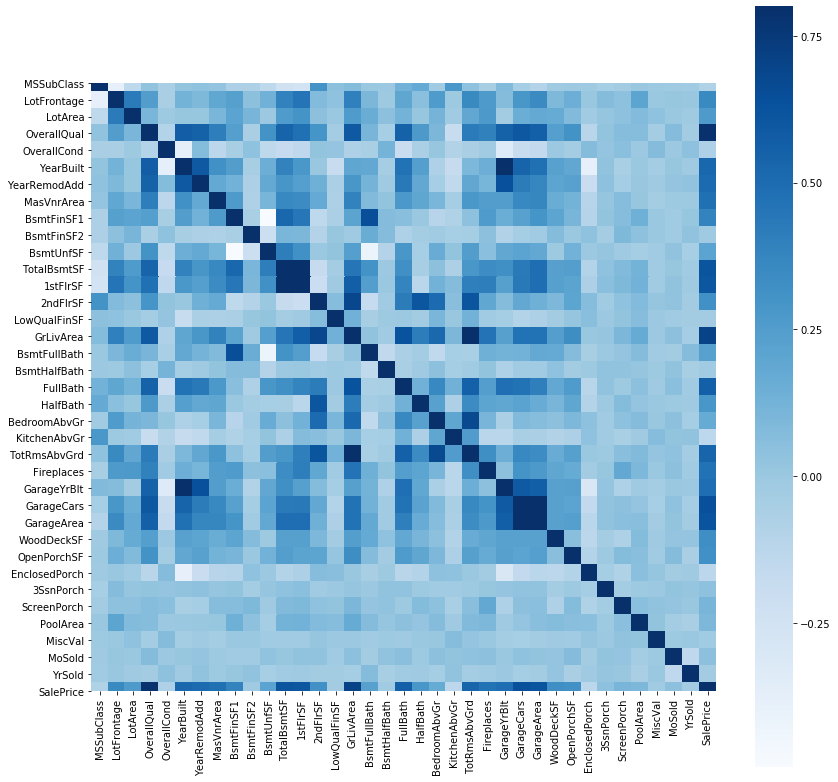

In [60]:
corr = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, vmax=.8, square=True, cmap='Blues')
plt.show()

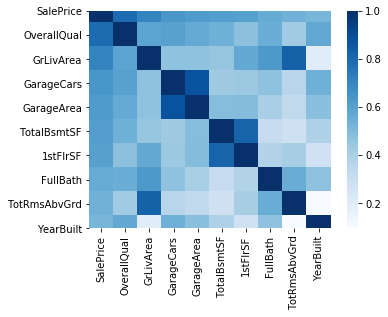

In [61]:
import numpy as np #top 10 correlations with SalesPrice
cols = corr.nlargest(10, 'SalePrice').index
sns.heatmap(np.corrcoef(df[cols].values.T), square=True, 
            yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

In [62]:
#correlations of the dependent variable with all the others in descending order of the values of the correlation coefficients
df.corrwith(df['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [63]:
df['GarageCars'].corr(df['GarageArea'])

0.8824754142814627

In [64]:
df['TotalBsmtSF'].corr(df['1stFlrSF'])

0.8195299750050333

We can make the following conclusions based of the correlational analysis:
- 'OverallQual' and GrLivArea' have the highest correlation with 'SalePrice'
- 'GarageCars' and 'GarageArea' also have strong correlation with target variable. At the same time their correlation with each other is very strong too, which can be explained as the larger area of the garage can fit more cars. We should keep only one of them ('GarageCars', as it has higher correlation) when we proceed to price prediction
- The situation is the same with 'TotalBsmtSF' and '1stFlrSF'. This can be explained by an assumption that mostly the area of basement does not exceed the area of 1st floor
- The same is with 'TotRmsAbvGrd' and 'GrLivArea' (the total area fully depends on the area of all rooms)

### Predictor: Overall material and finish quality

The variable is ordinal. If we want to use it we should convert it into a series of dummy-variables.

In [65]:
df['OverallQual'].value_counts() 

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

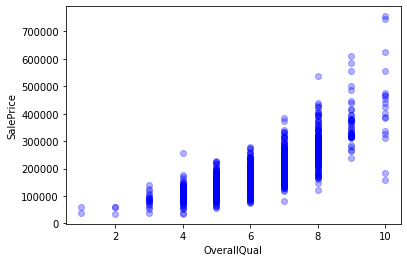

In [66]:
plt.scatter(df.OverallQual, df.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

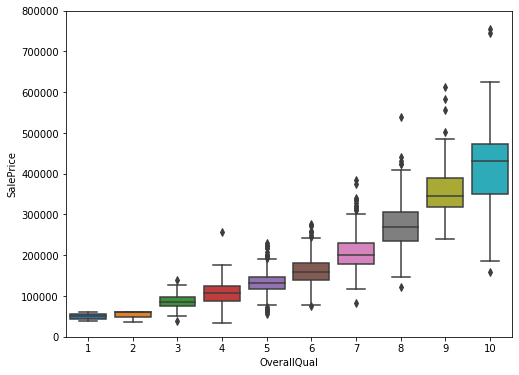

In [67]:
plt.figure(figsize=(8, 6))
fig = sns.boxplot(x=df['OverallQual'], y='SalePrice', 
                  data=pd.concat([df['SalePrice'], df['OverallQual']], axis=1))
fig.axis(ymin=0, ymax=800000)
plt.show()

The higher the quality, the higher the price.

### Predictor: Above grade (ground) living area square feet

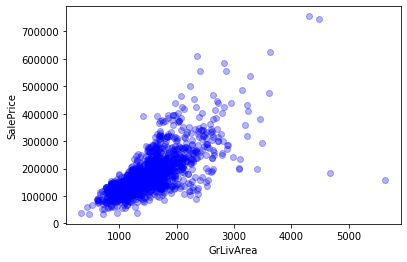

In [68]:
plt.scatter(df.GrLivArea, df.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

There is a positive linear relationship. We can see 2 extreme outliers on the bottom right: really large houses were sold for really cheap.

### Predictor: Size of garage in car capacity

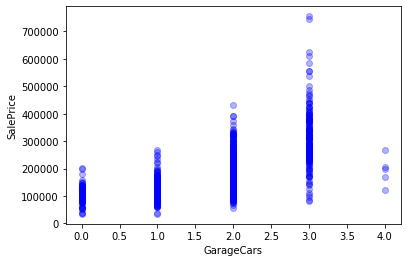

In [69]:
plt.scatter(df.GarageCars, df.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

### Predictor: Total square feet of basement area

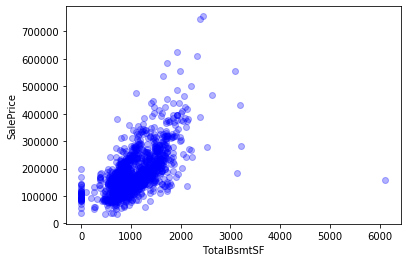

In [70]:
plt.scatter(df.TotalBsmtSF, df.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

There is a positive linear relationship and one outlier.

In [71]:
df[['GrLivArea','GarageCars','TotalBsmtSF']].corr()

,GrLivArea,GarageCars,TotalBsmtSF
GrLivArea,1.000000,0.467247,0.454868
GarageCars,0.467247,1.000000,0.434585
TotalBsmtSF,0.454868,0.434585,1.000000


There is no strong correlations between these three predictors.

### Categorical predictors

### Predictor: Heating quality and condition

In [72]:
df['HeatingQC'].value_counts()
#Po=Poor, Fa=Fair, Gd=Good, TA=Average/Typical, Ex=Excellent

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

We have only one case with 'Po' value, we will replace it with 'Fa'.

In [73]:
df['HeatingQC']=df['HeatingQC'].replace('Po', 'Fa')

In [74]:
df['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     50
Name: HeatingQC, dtype: int64

In [75]:
#Create dummy-variables
HeatingQC_dummies=pd.get_dummies(df.HeatingQC, prefix='HeatingQC', prefix_sep='_')
HeatingQC_dummies.head()

,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA
Id,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
5,1,0,0,0


HeatingQC_Ex will not be added into the regression model as "Excellent" is a reference group.

### Predictor: Paved driveway

In [76]:
df['PavedDrive'].value_counts()
#Y=Paved, N=Dirt/Gravel, P=Partial Pavement
#Paved will be a reference group

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [77]:
PavedDrive_dummies=pd.get_dummies(df.PavedDrive, prefix='PavedDrive', prefix_sep='_')
PavedDrive_dummies.head()

,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1


In [78]:
df = pd.concat([df, PavedDrive_dummies, HeatingQC_dummies], axis=1) 
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,PavedDrive_N,PavedDrive_P,PavedDrive_Y,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,0,0,1,1,0,0,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,0,0,1,1,0,0,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,0,0,1,1,0,0,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,WD,Abnorml,140000,0,0,1,0,0,1,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,175000,0,0,1,1,0,0,0
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,210000,0,0,1,0,0,0,1
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,266500,0,0,1,1,0,0,0


# Regression

In [79]:
import statsmodels.api as sm
df_model1 = df.dropna(subset=['SalePrice', 'GrLivArea'])
df_model1.shape

(1460, 87)

# Simple linear regression

In [80]:
x_simple = df_model1['GrLivArea']
y = df_model1['SalePrice']
x_simple_constant = sm.add_constant(x_simple) #add a constant in the model
model1 = sm.OLS(y, x_simple_constant).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          4.52e-223
Time:                        15:25:35   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

1.857e+04 = 18570

# Multiple linear regression

In [81]:
df_model2 = df.dropna(subset=['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'HeatingQC_Fa', 'HeatingQC_Gd',
                       'HeatingQC_TA', 'PavedDrive_N', 'PavedDrive_P']) 
#HeatingQC_Ex, PavedDrive_Y - reference groups 
df_model2.shape

(1460, 87)

In [82]:
x_mult = df_model2[['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'HeatingQC_Fa', 'HeatingQC_Gd',
                       'HeatingQC_TA', 'PavedDrive_N', 'PavedDrive_P']]
y = df_model2['SalePrice']
x_mult_constant = sm.add_constant(x_mult)

In [83]:
model2 = sm.OLS(y, x_mult_constant).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     438.2
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:25:38   Log-Likelihood:                -17647.
No. Observations:                1460   AIC:                         3.531e+04
Df Residuals:                    1451   BIC:                         3.536e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -415.6887   4725.528     -0.088   

### Model with standardized coefficients (beta coefficients)

Values of standardized coefficients can be compared with each other. Based on them it is possible to determine which of the predictors is more strongly correlated with the dependent variable.

In [84]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              438.5
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:25:44   Log-Likelihood:                         -1174.9
No. Observations:                1460   AIC:                                      2366.
Df Residuals:                    1452   BIC:                                      2408.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Model Characteristics

In [85]:
print('R^2 = {:f}'.format(model2.rsquared))
print('F-test significance = {:f}'.format(model2.f_pvalue))

R^2 = 0.707240
F-test significance = 0.000000


Model is statistically significant. It explains 70,7% of the 'SalePrice' variation.

In [86]:
f'Statistically significant model parameters: {model2.pvalues[model2.pvalues < 0.05].index.values}'

"Statistically significant model parameters: ['GrLivArea' 'GarageCars' 'TotalBsmtSF' 'HeatingQC_Fa' 'HeatingQC_Gd'\n 'HeatingQC_TA' 'PavedDrive_N']"

In [87]:
f'Statistically nonsignificant model parameters: {model2.pvalues[model2.pvalues > 0.05].index.values}'

"Statistically nonsignificant model parameters: ['const' 'PavedDrive_P']"

### Regression equation

In [88]:
l = []
for (param, index) in zip(model2.params[1:], model2.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Y = {:2f} + {}'.format(model2.params[0], ' + '.join(l)))

Y = -415.688744 + 64.10*GrLivArea + 28196.59*GarageCars + 45.44*TotalBsmtSF + -28610.76*HeatingQC_Fa + -20155.63*HeatingQC_Gd + -28490.00*HeatingQC_TA + -14511.64*PavedDrive_N + -5757.22*PavedDrive_P


### Regression coefficients interpretation

- Let's consider the coefficient on the variable GrLivArea, which represents the living area of the above ground floors in square feet. The regression coefficient for the variable is positive and equals 64.17. It can be concluded that with an increase in area by one square, on average, we can expect that the price will increase by 64.17 dollars.
- TBC

# Model Diagnostics

### Residuals

In [89]:
p = stats.kstest(model2.resid, 'norm', args=(model2.resid.mean(), model2.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


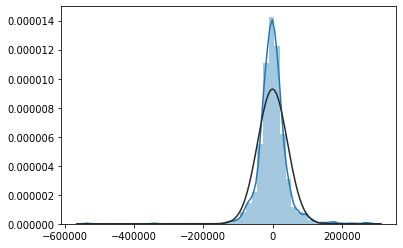

In [90]:
sns.distplot(model2.resid, fit=stats.norm) 

Distribution of residuals is different from the normal distribution.

### Heteroscedasticity 

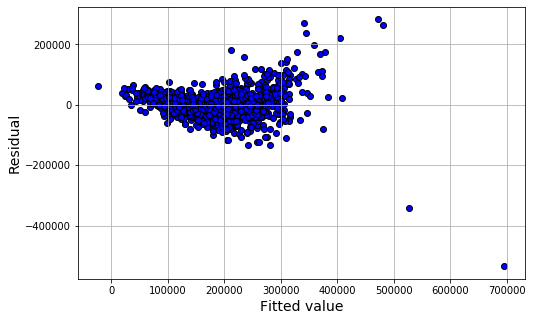

In [91]:
plt.figure(figsize=(8,5))
plt.scatter(x=model2.fittedvalues, y=model2.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

There is a relationship between the residuals and the predicted values of the dependent variable. Therefore, there is a problem of heteroscedasticity.

### Multicollinearity 

In [92]:
vifs = np.array([vif(model2.model.exog, i) for i in range(model2.model.exog.shape[1])])

In [93]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model2.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
7,1.059401,PavedDrive_P
6,1.106753,PavedDrive_N
3,1.120745,HeatingQC_Fa
4,1.184041,HeatingQC_Gd
5,1.256601,HeatingQC_TA
2,1.416795,TotalBsmtSF
0,1.447353,GrLivArea
1,1.532095,GarageCars


There are no VIF values greater than 10. There is no multicollinearity problem.

### Outliers and influential cases

In [94]:
influence = model2.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_GrLivArea,dfb_GarageCars,dfb_TotalBsmtSF,dfb_HeatingQC_Fa,dfb_HeatingQC_Gd,dfb_HeatingQC_TA,dfb_PavedDrive_N,dfb_PavedDrive_P,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
Id,,,,,,,,,,,,,,,
1,0.001779,0.001066,0.000219,-0.002279,-0.000954,-0.001853,-0.002108,-0.000647,-0.000159,0.000002,0.093462,0.001975,0.004158,0.093430,0.004157
2,-0.006111,0.007218,-0.001438,-0.003793,0.002652,0.005226,0.006629,0.000323,-0.000106,0.000019,-0.295136,0.001993,-0.013190,-0.295044,-0.013186
3,0.004117,0.003799,-0.000029,-0.005549,-0.002517,-0.005003,-0.005689,-0.001791,-0.000467,0.000014,0.261140,0.001886,0.011352,0.261056,0.011349
4,0.034679,-0.004601,-0.088521,0.052128,-0.009451,-0.097320,-0.019566,0.001574,0.006929,0.002284,-1.593821,0.008028,-0.143377,-1.594669,-0.143454
5,0.009025,-0.012734,-0.020065,0.014010,0.002781,0.007466,0.006483,-0.001204,-0.000598,0.000151,-0.629401,0.003425,-0.036898,-0.629270,-0.036890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.012733,-0.003797,-0.001448,0.011301,0.006793,0.013317,0.015457,0.004012,0.000923,0.000087,-0.692984,0.001632,-0.028014,-0.692860,-0.028009
1457,0.017110,-0.011174,0.001508,-0.010908,-0.003981,-0.004376,-0.022746,0.002005,0.002263,0.000108,-0.474832,0.004293,-0.031180,-0.474705,-0.031171
1458,0.010449,0.048135,-0.049069,-0.004953,-0.008266,-0.017623,-0.021761,-0.014974,-0.005376,0.000506,0.846974,0.006313,0.067512,0.846892,0.067505


In [95]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
#potential influential cases (these cases are also outliers)

Id
1299   -5.467639
524    -1.501769
692     1.006171
Name: dffits, dtype: float64

In [96]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
#potential outliers

Id
1299   -13.306711
524     -8.058559
1325    -3.109833
729     -3.059857
474      3.241039
592      3.308666
1244     3.568554
1182     3.668315
770      3.930273
179      4.043651
441      4.123053
689      4.194019
1047     4.609381
1170     5.150017
804      5.561682
1183     6.224708
899      6.287501
692      6.641721
Name: standard_resid, dtype: float64